<center><font size='5'>Fractals</font></center>
<center><font size='3'>Eric Martin, CSE, UNSW</font></center>
<center><font size='3'>COMP9021 Principles of Programming</font></center>

In [1]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# c.InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import zipfile
with zipfile.ZipFile('Illustrations.zip') as illustrations:
    illustrations.extractall('.')

In [3]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from itertools import accumulate
from random import randrange

# Affine transformations

An __affine transformation__ on the plane is a mapping $T$ that preserves collinearity and ratios of distances: given two points $A$ and $B$, if $C$ is the middle of the segment $[A,B]$ then $T(C)$ is the middle of the segment $[T(A), T(B)]$. Translations, contractions, expansions, reflections, rotations, are all particular cases of affine transformations. In general, an affine transformation $T$ maps a point $(x,y)$ to a point $(x',y')$ such that

\begin{equation*}
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
e \\
f
\end{pmatrix}
\end{equation*}

for some reals $a$, $b$, $c$, $d$, $e$ and $f$, that is:

\begin{equation*}
\begin{split}
x' &= ax+by + e\\
y' &= cx+dy + f\\
\end{split}
\end{equation*}

In other words, $T$ is the composition of a *linear transformation* with coefficients 
$a$, $b$, $c$ and $d$, and a translation with coefficients $e$ and $f$.

$T$ is totally determined by the image of three noncollinear points $P_1$, $P_2$ and $P_3$. Indeed, set $P_1=(x_1,y_1)$, $P_2=(x_2,y_2)$, $P_3=(x_3,y_3)$, $T(P_1)=(x'_1,y'_1)$, $T(P_2)=(x'_2,y'_2)$ and $T(P_3)=(x'_3,y'_3)$. Then $a$, $b$ and $e$ are the solutions of the system of equations

\begin{equation*}
\begin{split}
x_1a +y_1b + e = x'_1\\
x_2a +y_2b + e = x'_2\\
x_3a +y_3b + e = x'_3
\end{split}
\end{equation*}

and $c$, $d$ and $f$ are the solutions of the system of equations

\begin{equation*}
\begin{split}
x_1c +y_1d + f = y'_1\\
x_2c +y_2d + f = y'_2\\
x_3c +y_3d + f = y'_3
\end{split}
\end{equation*}

Both systems of equations have a unique solution iff

\begin{equation*}
\begin{vmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1
\end{vmatrix}
\neq 0
\end{equation*}

which is equivalent, since a determinant does not change if one line is subtracted from another line, to

\begin{equation*}
\begin{vmatrix}
x_1 & y_1 & 1 \\
x_2-x_1 & y_2 -y_1 & 0 \\
x_3-x_1 & y_3-y_1 & 0
\end{vmatrix}
\neq 0
\end{equation*}

which is equivalent to $(x_2-x_1)(y_3-y_1) - (y_2 -y_1)(x_3-x_1) \neq 0$, which is equivalent to $\frac{y_2-y_1}{x_2-x_1}\neq\frac{y_3-y_1}{x_3-x_1}$, that is, $P_1$, $P_2$ and $P_3$ are noncollinear.

# Barnsley fern

Barnsley fern is a __fractal__, a __scale invariant__ part of the plane, resembling the real fern __Black Spleenwort__, defined from four affine contractions, that is, affine transformations $T$ such that for all points $A$ and $B$ of the plane, $d\bigl(T(A),T(B)\bigr)<d(A,B)$. These transformations are:

* $T_1$, which maps the fern to its yellow part, by projecting all points of the fern on the $y$-axis before applying a contraction of factor $0.16$, sending the point $(x,y)$ to the point $(x',y')$ such that

\begin{equation*}
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 \\
0 & 0.16
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
0 \\
0
\end{pmatrix}
\end{equation*}

* $T_2$, which maps the fern to its green part, by mapping the tip of the fern to itself and the tips of the red and  blue leaflets to the tips of the largest left and right green leaflets, respectively, sending the point $(x,y)$ to the point $(x',y')$ such that

\begin{equation*}
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
0.85 & 0.04 \\
-0.04 & 0.85
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
0 \\
1.6
\end{pmatrix}
\end{equation*}

* $T_3$, which maps the fern to its red part, by mapping the bottom of the stem of the fern to the bottom of the stem of the red leaflet and the tips of the red and blue leaflets to the tips of the largest left and right leaflets of the red leaflet, respectively, sending the point $(x,y)$ to the point $(x',y')$ such that

\begin{equation*}
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
0.2 & -0.26 \\
0.23 & 0.22
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
0 \\
1.6
\end{pmatrix}
\end{equation*}

* $T_4$, which maps the fern to its blue part, by mapping the bottom of the stem of the fern to the bottom of the stem of the blue leaflet and the tips of the red and blue leaflets to the tips of the largest left and right leaflets of the blue leaflet, respectively, sending the point $(x,y)$ to the point $(x',y')$ such that

\begin{equation*}
\begin{pmatrix}
x' \\
y'
\end{pmatrix}
=
\begin{pmatrix}
-0.15 & 0.28 \\
0.26 & 0.24
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
+
\begin{pmatrix}
0 \\
0.44
\end{pmatrix}
\end{equation*}

<div><img src="Illustrations/colored_barnsley_fern.pdf" width="600"/></div>

# Banach's fixed point theorem

Denote by $d$ the distance between two points of the plane, $\mathbb{R}^2$. An __iterated function system__ (IFS) is a finite sequence of contracting affine transformations.

If $F$ is the set of points that make up Barnsley fern, then $T_1\langle F\rangle\cup T_2\langle F\rangle\cup T_3\langle F\rangle\cup T_4\langle F\rangle=F$, capturing the fact that Barnsley fern is the __attractor__ of the IFS $(T_1,T_2,T_3,T_4)$ defined in the previous section: it is the unique __fixed point__ of the operator $T$ that maps a compact subset $X$ of $\mathbb{R}^2$, that is, a bounded closed subset $X$ of $\mathbb{R}^2$, to $T_1\langle X\rangle\cup T_2\langle X\rangle\cup T_3\langle X\rangle\cup T_4\langle X\rangle$. The existence and unicity of $F$ follows from Banach's fixed point theorem:

**Theorem 1.**<a name=prop_1></a>$\ $ _Let $K$ be a complete metric space and let $T:K\rightarrow K$ be a contraction. Then $T$ has a unique fixed point. Moreover, for all points $X$ in $K$, $T^n(X)$ converges to this fixed point when $n$ tends towards infinity._

To apply the theorem, we take for $K$ the set of compact subsets of $\mathbb{R}^2$ and for the distance between two members of $K$, the *Hausdorff distance* $d_H$: given two compact subsets $X_1$ and $X_2$ of $\mathbb{R}^2$, the Hausdorff distance between $X_1$ and $X_2$ is the least real number $\delta$ such that every point in $X_1$ is at a distance of at most $\delta$ of some point in $X_2$, and every point in $X_2$ is at a distance of at most $\delta$ of some point in $X_1$:

\begin{equation*}
d_H(X_1,X_2)=\max\bigl(\max_{x_1\in X_1}\min_{x_2\in X_2}d(x_1,x_2),\max_{x_2\in X_2}\min_{x_1\in X_1}d(x_1,x_2)\bigr)
\end{equation*}

For the theorem to apply, we need to verify that if $(T_1,\dots,T_n)$ is an IFS, then the function $T$ that maps a compact subset $X$ of $\mathbb{R}^2$ to $T_1\langle X\rangle\cup\dots\cup T_n\langle X\rangle$ is a contraction. It suffices to show the following: if for all $i\in\{1,\dots,n\}$, $T_i$ has a contraction factor of $r_i\in[0,1)$, then $T$ has a contraction factor equal to $\max(r_1,\dots,r_n)$, that is: if for all $i\in\{1,\dots,n\}$ and members $x_1$ and $x_2$ of $\mathbb{R}$, $d(T_i(x_1),T_i(x_2))$ is at most equal to $r_i d(x_1,x_2)$ then for all compact subsets $X_1$ and $X_2$ of $\mathbb{R}^2$, $d_H\bigl(T(X_1),T(X_2)\bigr)$ is at most equal to $\max(r_1,\dots,r_n)d_H(X_1,X_2)$. This follows from the two lemmas that follow.

**Lemma 2.**<a name=prop_2></a>$\ $ _Let $T$ be an affine contraction and $r\in[0,1)$ be a contraction factor for $T$. Then the mapping, still denoted $T$, that maps a compact subset $X$ of $\mathbb{R}^2$ to $\{T(x)\mid x\in X\}$ is a contraction of contraction factor $r$._

_Proof._$\ $ Let $X_1$ and $X_2$ be two compact subsets of $\mathbb{R}^2$. It suffices to show that $d_H\bigl(T(X_1),T(X_2)\bigr)\leq r d_H(X_1,X_2)$, that is: for all $u\in X_1$, $\min_{x_2\in X_2}d\bigl(T(u),T(x_2)\bigr)\leq r d_H(X_1,X_2)$. Let $u\in X_1$ be given. Since for all $v\in X_2$, $d\bigl(T(u),T(v)\bigr)\leq r d(u,v)$, it follows that for all $v\in X_2$, $\min_{x_2\in X_2}d\bigl(T(u),T(x_2)\bigr)\leq r d(u,v)$, hence

\begin{equation*}
\min_{x_2\in X_2}d\bigl(T(u),T(x_2)\bigr)\leq r\min_{x_2\in X_2} d\bigl(u,x_2)\bigr)\leq r\max_{x_1\in X_1}\min_{x_2\in X_2} d(x_1,x_2)\leq r d_H(X_1,X_2),
\end{equation*}

and we are done.$\ $ Q.E.D.

**Lemma 3.**<a name=prop_3></a>$\ $ _Let $A$, $B$, $C$ and $D$ be compact subsets of $\mathbb{R}^2$. Then $d_H(A\cup B,C\cup D)\leq\max\bigl(d_H(A,C),d_H(B,D)\bigr)$._

_Proof._$\ $ It suffices to show that $d_H(A\cup B,C\cup D)\leq d_H(A,C)$ or $d_H(A\cup B,C\cup D)\leq d_H(B,D)$, that is: for all $u\in A\cup B$, $\min_{y\in C\cup D}d(u,y)\leq d_H(A,C)$ or $\min_{y\in C\cup D}d(u,y)\leq d_H(B,D)$. Let $u\in A\cup B$ be given. Since $C\cup D$ is compact, let $v\in C\cup D$ be such that $d(u,v)=\min_{y\in C\cup D}d(u,y)$. So $d(u,v)\leq\min_{y\in C}d(u,y)$ and $d(u,v)\leq\min_{y\in D}d(u,y)$. Moreover, either $u\in A$, in which case $\min_{y\in C}d(u,y)\leq\max_{x\in A}\min_{y\in C}d(x,y)=d_H(A,C)$, or $u\in B$, in which case $\min_{y\in D}d(u,y)\leq\max_{x\in B}\min_{y\in D}d(x,y)=d_H(B,D)$, and we are done.$\ $ Q.E.D.

Let us now prove Banach's fixed point theorem.

_Proof of Theorem [1](#prop_1)._$\ $ Denoting by $d$ the distance on the complete metric space $K$, and by $r$ the contraction factor of $T$. For unicity, assume for a contradiction that $X_1$ and $X_2$ are two distinct fixed points of $T$. Then $T(X_1)-T(X_2)=X_2-X_1$, so $d\bigl(T(X_1),T(X_2)\bigr)=d(X_1,X_2)\neq 0$. Moreover, since $T$ is a contraction, $d\bigl(T(X_1),T(X_2)\bigr)\leq r d(X_1,X_2)$ for some $r\in[0,1)$; contradiction indeed. Let $X_0$ be a member of $K$ and for all $n\in\mathbb{N}$, set $X_{n+1}=T(X_n)$. To complete the proof, it suffices to show that $(X_n)_{n\in\mathbb{N}}$ converges to a member $X$ of $K$, and that $X$ is a fixed point of $T$. If $X_1=X_0$ then we are done, so suppose otherwise. As $K$ is complete, in order to show that $(X_n)_{n\in\mathbb{N}}$ converges, it suffices to verify that $(X_n)_{n\in\mathbb{N}}$ is a Cauchy sequence, that is: for all $\epsilon>0$, there exists $p\in\mathbb{N}$ such that for $m>p$ and $n>m$, $d(X_n,X_m)<\epsilon$. First note that for all $n\geq 1$, $d(X_{n+1},X_n)=d\bigl(T(X_n),T(X_{n-1})\bigr)\leq r d(X_n,X_{n-1})$, so for all $n\in\mathbb{N}$, $d(X_{n+1},X_n)\leq r^nd(X_1,X_0)$. Then note that for all $m\in\mathbb{N}$ and $n>m$,

\begin{equation*}
\begin{split}
d(X_n,X_m) &= d\bigl((X_n,X_{n-1})+(X_{n-1},X_{n-2})+\dots+(X_{m+1},X_m)\bigr)\\
                     &\leq d(X_n,X_{n-1})+d(X_{n-1},X_{n-2})+\dots+d(X_{m+1},X_m)\\
                     &\leq (r^{n-1}+r^{n-2}+\dots+r^m)d(X_1,X_0)\\
                     &\leq \frac{r^m}{1-r}d(X_1,X_0)
\end{split}
\end{equation*}

Since $r<1$, this implies that $(X_n)_{n\in\mathbb{N}}$ is indeed a Cauchy sequence. Now observe that $T$ is continuous, and actually uniformly continuous: for all $\epsilon>0$ and $X,X'\in K$, if $d(X,X')<\epsilon$ then $d\bigl(T(X),T(X')\bigr)\leq r d(X,X')<r\epsilon<\epsilon$. Since $T$ is continuous and $(X_n)_{n\in\mathbb{N}}$ converges to some member of $K$, say $X$, $\bigl(T(X_n)\bigr)_{n\in\mathbb{N}}$ converges to $T(X)$. Then $T(X)=\lim_{n\rightarrow\infty}T(X_n)=\lim_{n\rightarrow\infty}X_{n+1}=X$, completing the proof of the theorem.$\ $ Q.E.D.

# Practical application

The fixed point of the contraction $T:K\rightarrow K$ of Banach's fixed point theorem can be obtained by successive applications of $T$ starting from an arbitrary point of $K$.

Let us see this in action with Sierpinsky triangle, which is obtained from an iterated function system consisting of three affine contractions, which are the composition of a contraction of factor 0.5, hence a linear transformation defined by the matrix

\begin{equation*}
\begin{pmatrix}
0.5 & 0 \\
0 & 0.5
\end{pmatrix}
\end{equation*}

and one of the following three translations (taking the lower left corner of the triangle as origin):

* identity (for the lower left subtriangle),
* a translation by $(0.5,0)$ (for the lower right subtriangle)
* a translation by $(0.25,0.5)$ (for the top subtriangle)

Here is what is obtained in 4 iterations, starting with the unit square with the origin as lower left corner:

<div><img src="Illustrations/sierpinsky_1.pdf" width="100"/></div>

And here is what is obtained in 4 iterations, starting with some particular part of the unit square:

<div><img src="Illustrations/sierpinsky_2.pdf" width="100"/></div>

Any compact subset of $\mathbb{R}^2$ can be used as a starting point. It does not have to be included in the unit  square; it can simply be an arbitrary point $p$ of $\mathbb{R}^2$---indeed, $\{p\}$ is compact. Let us consider again Barnsley fern $F$. If we chose as starting point an arbitrary point $p$ of $\mathbb{R}^2$ that belongs to $F$, then $F$ is the topological closure of the union of

* $\{p\}$
* $T_1\langle\{p\}\rangle$, $T_2\langle\{p\}\rangle$, $T_3\langle\{p\}\rangle$, $T_4\langle\{p\}\rangle$, 
* $T_1\langle T_1\langle\{p\}\rangle\rangle$, $T_1\langle T_2\langle\{p\}\rangle\rangle$, $T_1\langle T_3\langle\{p\}\rangle\rangle$, $T_1\langle T_4\langle\{p\}\rangle\rangle$, $T_2\langle T_1\langle\{p\}\rangle\rangle$, $T_2\langle T_2\langle\{p\}\rangle\rangle$, $T_2\langle T_3\langle\{p\}\rangle\rangle$, $T_2\langle T_4\langle\{p\}\rangle\rangle$, $T_3\langle T_1\langle\{p\}\rangle\rangle$, $T_3\langle T_2\langle\{p\}\rangle\rangle$, $T_3\langle T_3\langle\{p\}\rangle\rangle$, $T_3\langle T_4\langle\{p\}\rangle\rangle$, $T_4\langle T_1\langle\{p\}\rangle\rangle$, $T_4\langle T_2\langle\{p\}\rangle\rangle$, $T_4\langle T_3\langle\{p\}\rangle\rangle$, $T_4\langle T_4\langle\{p\}\rangle\rangle$,
* ...

In practice, we start from $p_0=(0,0)$, which is the point at the bottom of the stem of the fern. For all $n>0$, we generate at stage $n$ a point $p_n$, in such a way that for all $n>0$,:

* $p_{n+1}$ is $T_1(p_n)$ with probability 0.01,
* $p_{n+1}$ is $T_2(p_n)$ with probability 0.85,
* $p_{n+1}$ is $T_3(p_n)$ with probability 0.07,
* $p_{n+1}$ is $T_4(p_n)$ with probability 0.07.

so that the number of points drawn in the yellow, green, red and blue parts of the fern are in proportion of those probabilities, respectively.

As for the widget's factor, it is used to appropriately scale the image of the fern.

# Implementation

Let us define a class to record an affine transformation, with one attribute for the 2 x 2 matrix of of coefficients of the associated linear transformation, and another attribute for the associated translation vector.

In [5]:
class AffineTransformation:
    def __init__(self, *, a=0, b=0, c=0, d=0, e=0, f=0):
        self.linear_coefficients = np.array([[a, b], [c, d]])
        self.translation_vector = np.array([[e], [f]])

An IFS for Barnsley fern then consists of the following four `AffineTransformation` objects:

In [6]:
upper_leaflets_stem = AffineTransformation(d=0.16)
upper_leaflets = AffineTransformation(a=0.85, b=0.04, c=-0.04, d=0.85, f=1.6)
lower_left_leaflet = AffineTransformation(a=0.2, b=-0.26, c=0.23, d=0.22,
                                          f=1.6
                                         )
upper_left_leaflet = AffineTransformation(a=-0.15, b=0.28, c=0.26, d=0.24,
                                          f=0.44
                                         )

Associating, as previously described, each of the four affine transformations with a weight that determines the probably of, at each step, applying to the last generated point that affine transformation rather than any of the other three, suggests to represent the "IFS with weights" for Barnsley fern as the following dictionary:

In [7]:
ifs_with_weights = {upper_leaflets_stem: 1, upper_leaflets: 85,
                    lower_left_leaflet: 7, upper_left_leaflet: 7
                   }

To choose which affine transformation of the IFS to apply, we can generate a random number $r$ between 1 + 85 + 7 + 7, and chose `upper_leaflets_stem` if $r<1$, `upper_leaflets` if $1\leq r<1+85=86$, `lower_left_leaflet` if $86\leq r<86+7=93$, and `upper_left_leaflet` if $93\leq r<93+7=100$ (due to the probabilistic interpretation of choosing one affine transformation over another, it makes sense to require that the weights add up to 100, but that is not necessitated by the code below). This suggests defining another dictionary from `ifs_with_weights`, `weighted_ifs`, to make this process easier to implement. The `accumulate` class from the `itertools` module is useful here:

In [8]:
list(accumulate((1, 20, 300)))
set(accumulate(range(1, 6), lambda x, y: x * y))

[1, 21, 321]

{1, 2, 6, 24, 120}

In [9]:
sum_of_weights = sum(ifs_with_weights.values())
sum_of_weights

weighted_ifs = dict(zip(accumulate(ifs_with_weights.values()),
                        ifs_with_weights
                       )
                   )
weighted_ifs

for _ in range(10):
    r = randrange(sum_of_weights)
    for weight in weighted_ifs:
        if r < weight:
            print('r is', r, 'will apply', weighted_ifs[weight])
            break

100

{1: <__main__.AffineTransformation at 0x10d7f2950>,
 86: <__main__.AffineTransformation at 0x10d7f93d0>,
 93: <__main__.AffineTransformation at 0x10d7fb190>,
 100: <__main__.AffineTransformation at 0x10d7fbd10>}

r is 61 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 37 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 58 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 81 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 27 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 84 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 84 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 95 will apply <__main__.AffineTransformation object at 0x10d7fbd10>
r is 48 will apply <__main__.AffineTransformation object at 0x10d7f93d0>
r is 68 will apply <__main__.AffineTransformation object at 0x10d7f93d0>


We illustrate five multiplications involving a matrix:

* multiplying each element of a matrix by a scalar;
* for each row of a matrix, multiplying each element by the corresponding element of a row vector;
* for each column of a matrix, multiplying each element by the corresponding element of a column vector;
* multiplying a matrix by a column vector;
* multiplying a row vector by a matrix.

The last operation is what we need:

In [10]:
upper_leaflets.linear_coefficients
upper_leaflets.linear_coefficients * 2
upper_leaflets.linear_coefficients * [2, 20]
upper_leaflets.linear_coefficients * [[2], [20]]
2 * 0.85 + 20 * -0.04, 2 * 0.04 + 20 * 0.85
[2, 20] @ upper_leaflets.linear_coefficients
0.85 * 2 + 0.04 * 20, -0.04 * 2 + 0.85 * 20
upper_leaflets.linear_coefficients @ [[2], [20]]

array([[ 0.85,  0.04],
       [-0.04,  0.85]])

array([[ 1.7 ,  0.08],
       [-0.08,  1.7 ]])

array([[ 1.7 ,  0.8 ],
       [-0.08, 17.  ]])

array([[ 1.7 ,  0.08],
       [-0.8 , 17.  ]])

(0.8999999999999999, 17.08)

array([ 0.9 , 17.08])

(2.5, 16.92)

array([[ 2.5 ],
       [16.92]])

Putting everything together, we define a `Fractal` class with a method, `draw` to, from the point (0, 0), generate as previously described a sequence of points of length provided as argument, and then let `matplotlib` create a figure that displays the points. We `plt.axis('equal')`, we make sure that the scale is the same both horizontally and vertically. The optional `s` keyword argument to `scatter` is for the size of the point to draw expressed in square point:

In [11]:
class Fractal:
    def __init__(self, contractions):
        self.contractions = contractions
        self.sum_of_weights = sum(contractions.values())
        self.contractions = dict(zip(accumulate(contractions.values()),
                                     contractions
                                    )
                                )
        
    def draw(self, nb_of_iterations):
        plt.axis('equal')
        point = np.array([[0], [0]])
        points = []
        for _ in range(nb_of_iterations):
            r = randrange(self.sum_of_weights)
            for weight in self.contractions:
                if r < weight:
                    point =\
                         self.contractions[weight].linear_coefficients @ point\
                         + self.contractions[weight].translation_vector
                    points.append(point)
                    break
        plt.scatter(*zip(*points), s=1)

Let us observe the outcome of generating 100, 1,000, 10,000 and 100,000 points to draw Barnsley fern:

In [12]:
barnsley_fern = Fractal(ifs_with_weights)

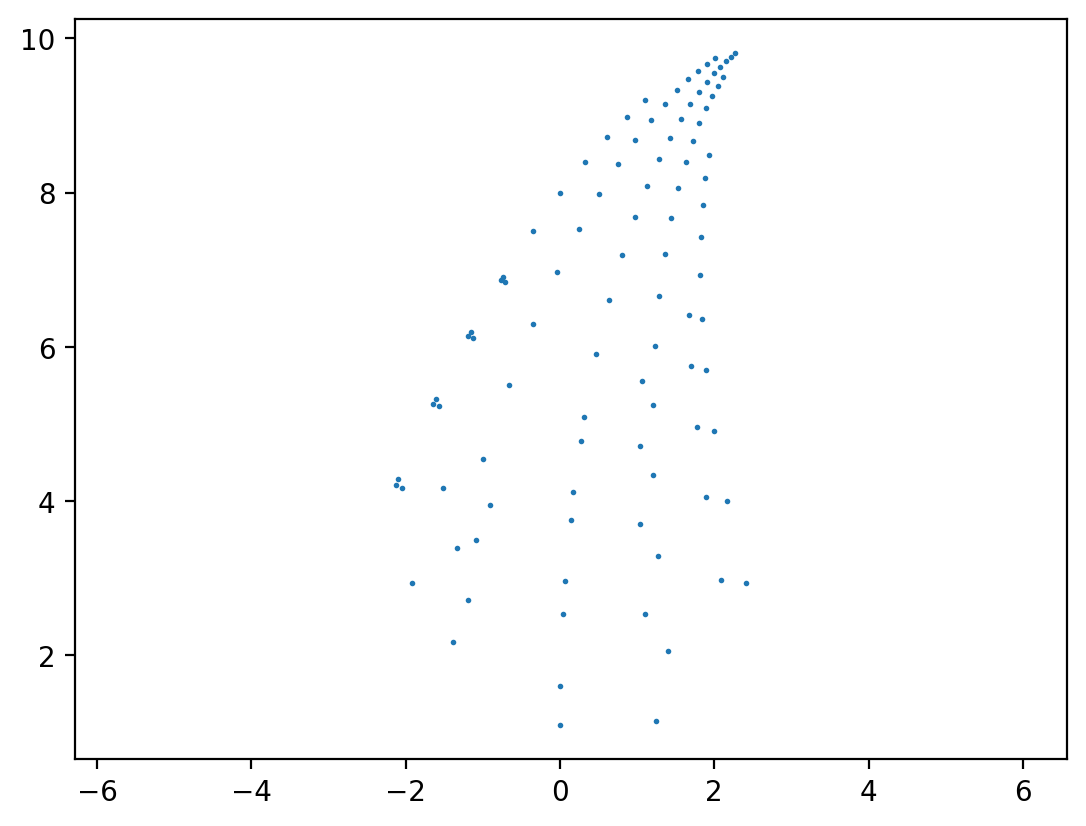

In [13]:
barnsley_fern.draw(100)

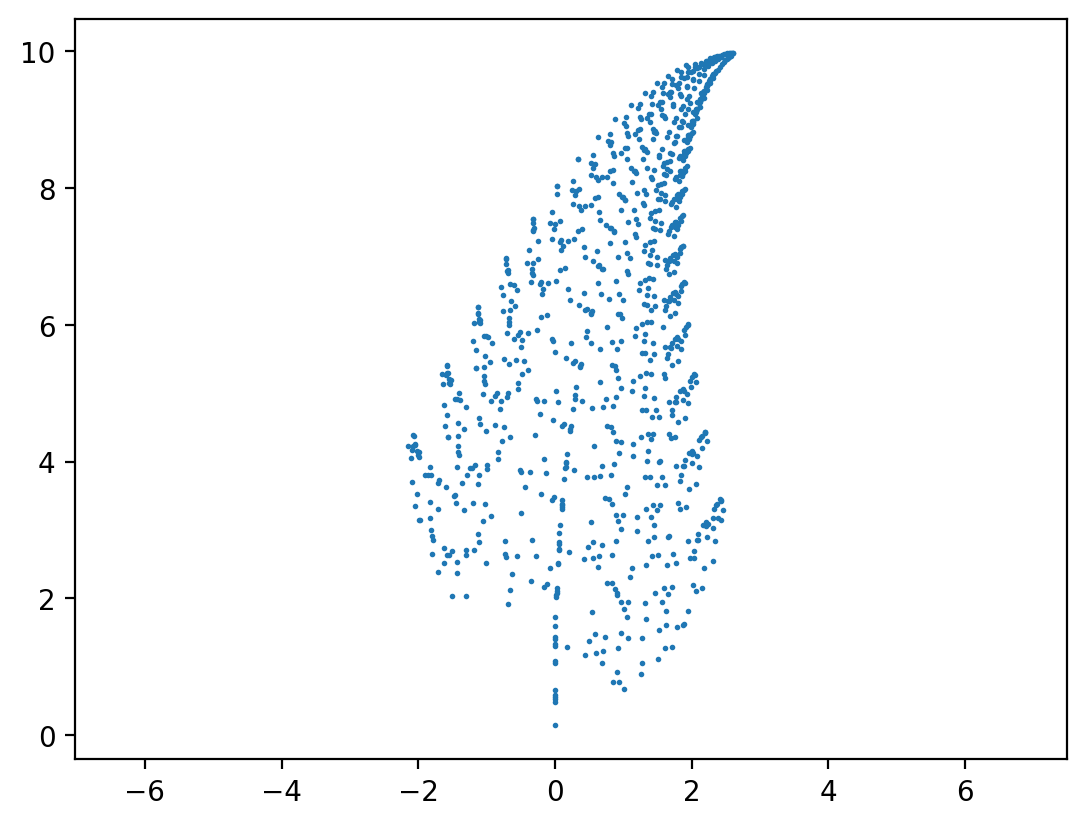

In [14]:
barnsley_fern.draw(1_000)

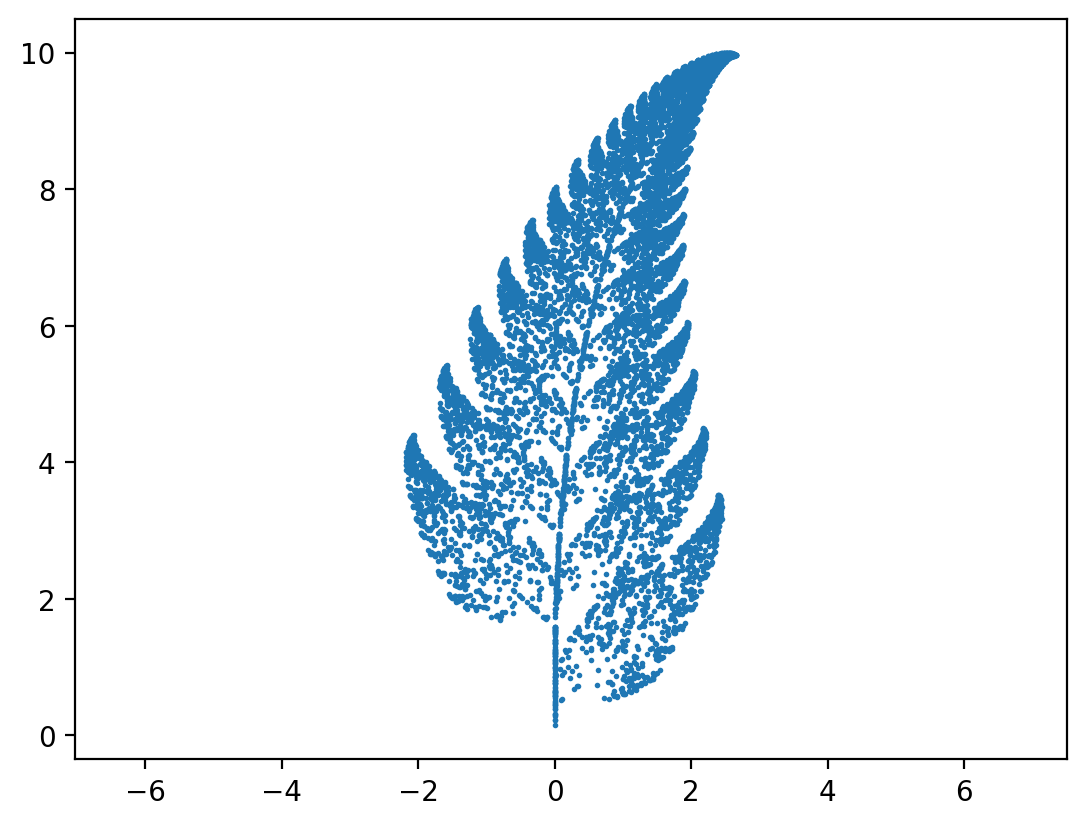

In [15]:
barnsley_fern.draw(10_000)

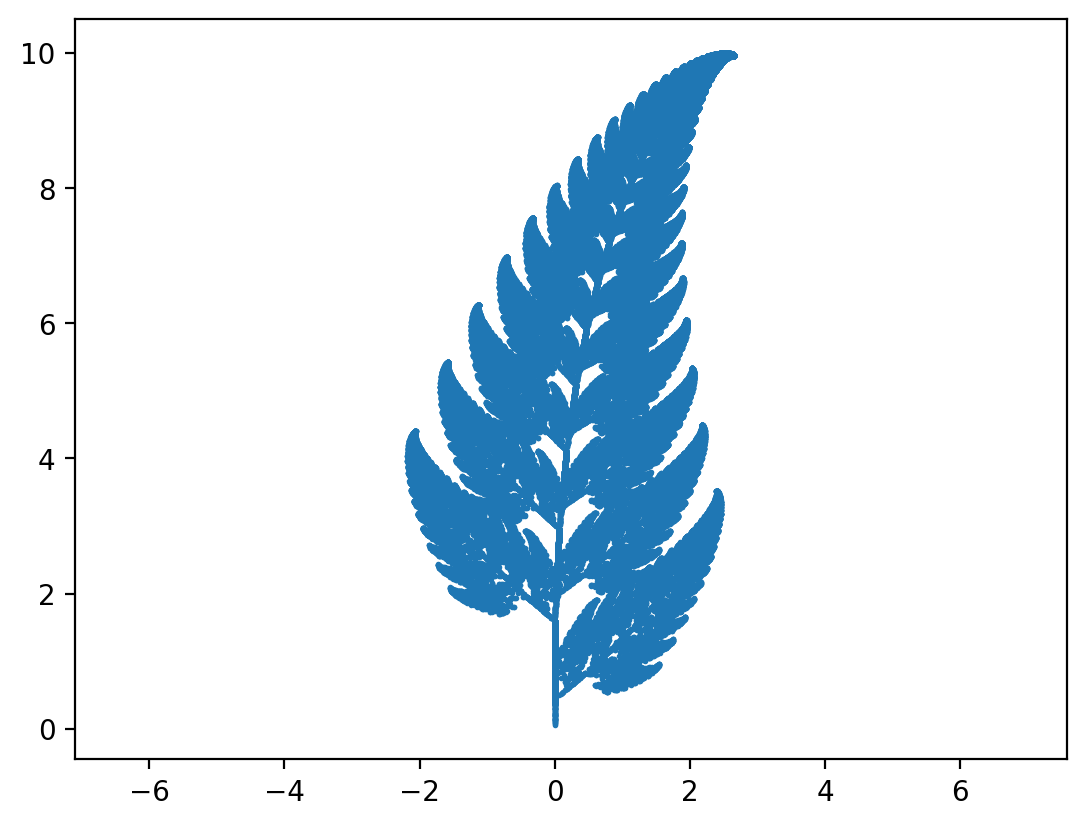

In [16]:
barnsley_fern.draw(100_000)

For Sierpinsky triangle, the IFS consists of three affine transformations with the same associated linear transformation, namely, a contraction of factor 0.5. It is convenient to define the following dictionary:

In [17]:
half_contraction = {'a': 0.5, 'd': 0.5}

`half_contraction` can then be "unpacked" and the values of `a` and `b` provided as arguments to the `init()` method of `AffineTransformation` thanks to the `**` symbol. The function `f()` that follows illustrates this syntax:

In [18]:
def f(a, b, c, d, e):
    print(a, b, c, d, e)
    
f(1, e=5, **{'b': 2, 'c':3}, d=4)

1 2 3 4 5


The `**` symbol can also be used in the definition of a function to make a dictionary out of all "extra" keyword arguments:

In [19]:
def g(a, b, **x):
    print(a, b, x)
    
g(1, b=2, c=3, d=4, e=5)

1 2 {'c': 3, 'd': 4, 'e': 5}


In full generality, `*` and `**` can appear in function definitions and function calls, to pack and unpack sequences of values and variables mapped to values, respectively. The following illustrates: 

In [20]:
# **y must come last.
# As c is given a default value, d must be given a default value.
# e, f and g are keyword-only parameters.
def h(a, b, c=30, d=40, *x, e, f=60, g, **y):
    print(a, b, c, d, e, f, g, x, y)

# The positional arguments, namely 1, 2, *(200, 300), 4 and
# *(200, 300, 400, 500, 600) must come before the keyword arguments.
h(1, 2, g=7, e=5)
h(1, **{'b': 2, 'g': 7, 'e': 5})
h(1, *(200, 300), 4, e=5, **{'g': 7, 'h': 8}, i=6)
h(1, *(200, 300, 400, 500, 600), **{'f': 6, 'g': 7, 'h': 8}, i=6, e=5)

1 2 30 40 5 60 7 () {}
1 2 30 40 5 60 7 () {}
1 200 300 4 5 60 7 () {'h': 8, 'i': 6}
1 200 300 400 5 6 7 (500, 600) {'h': 8, 'i': 6}


The application of the `**` syntax to our needs is simple:

In [21]:
sierpinsky_triangle = Fractal(
         {# Lower left subtriangle
          AffineTransformation(**half_contraction): 33,
          # Upper right subtriangle
          AffineTransformation(**half_contraction, e=0.5): 33,
          # Upper subtriangle
          AffineTransformation(**half_contraction, e=0.25, f=0.5): 34 
         }
                             )

We can now observe the outcome of generating 100, 1,000, 10,000 and 100,000 points to draw Sierpinsky triangle:

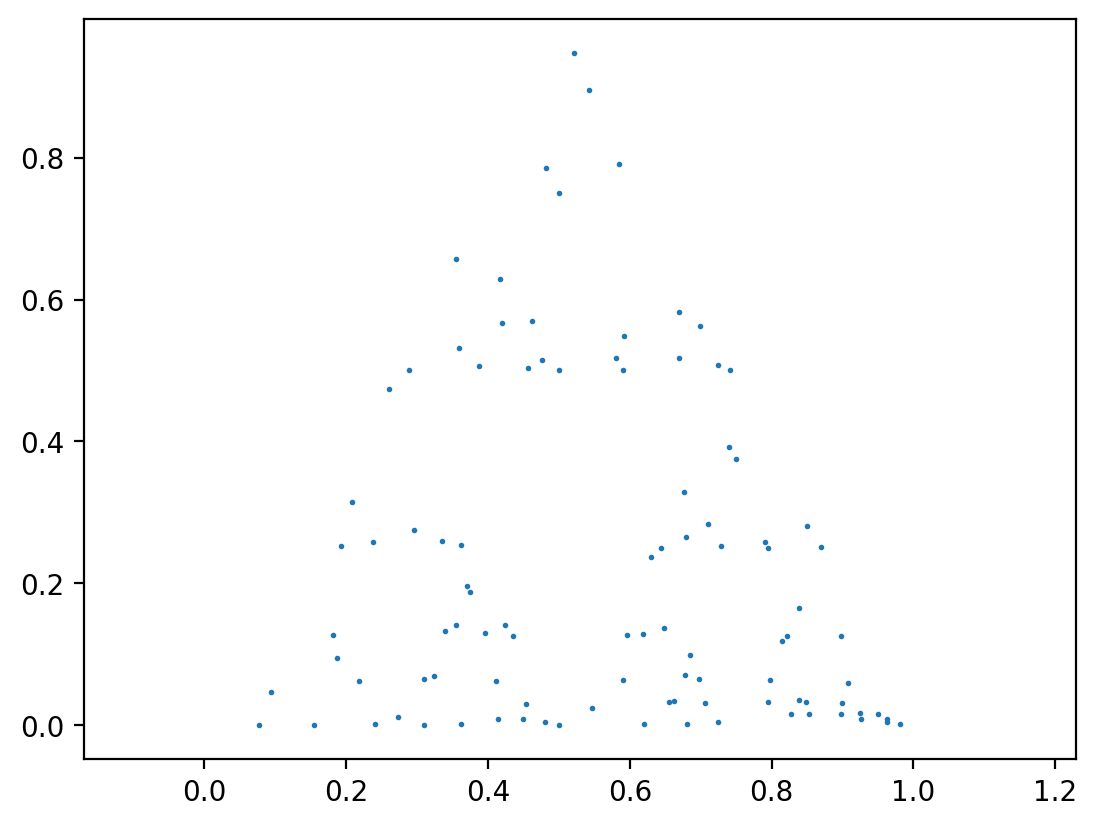

In [22]:
sierpinsky_triangle.draw(100)

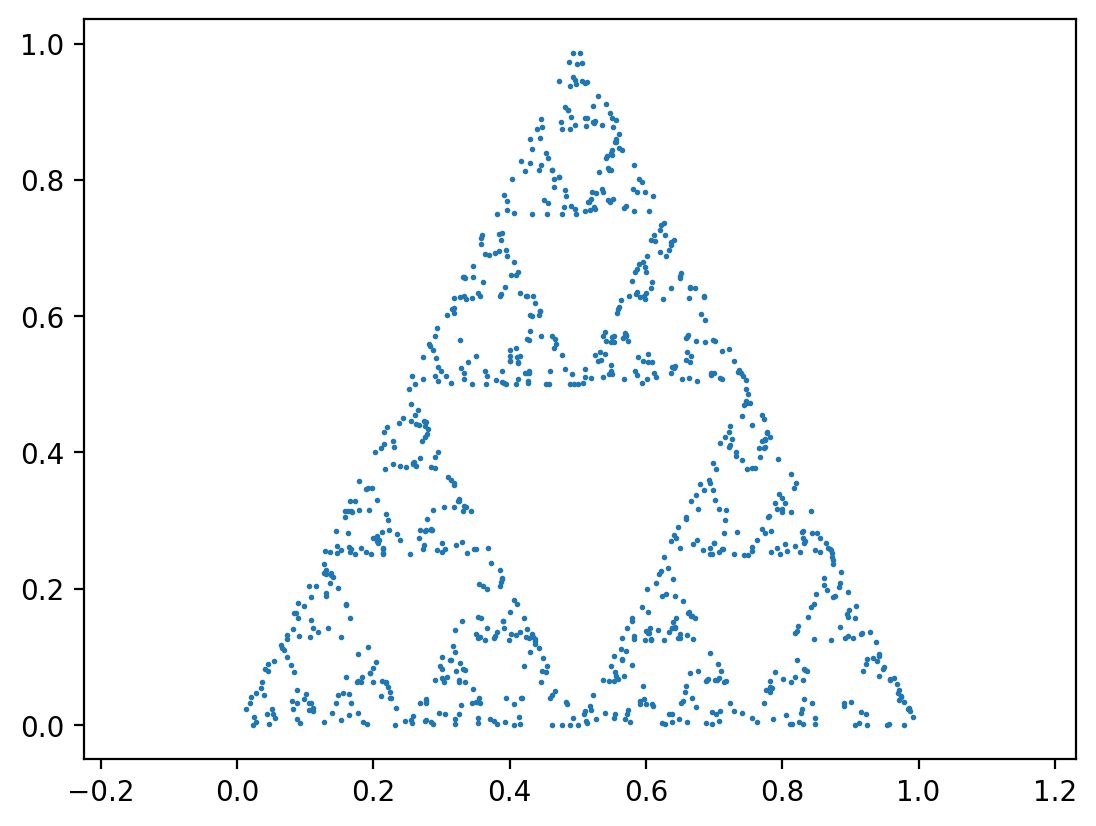

In [23]:
sierpinsky_triangle.draw(1_000)

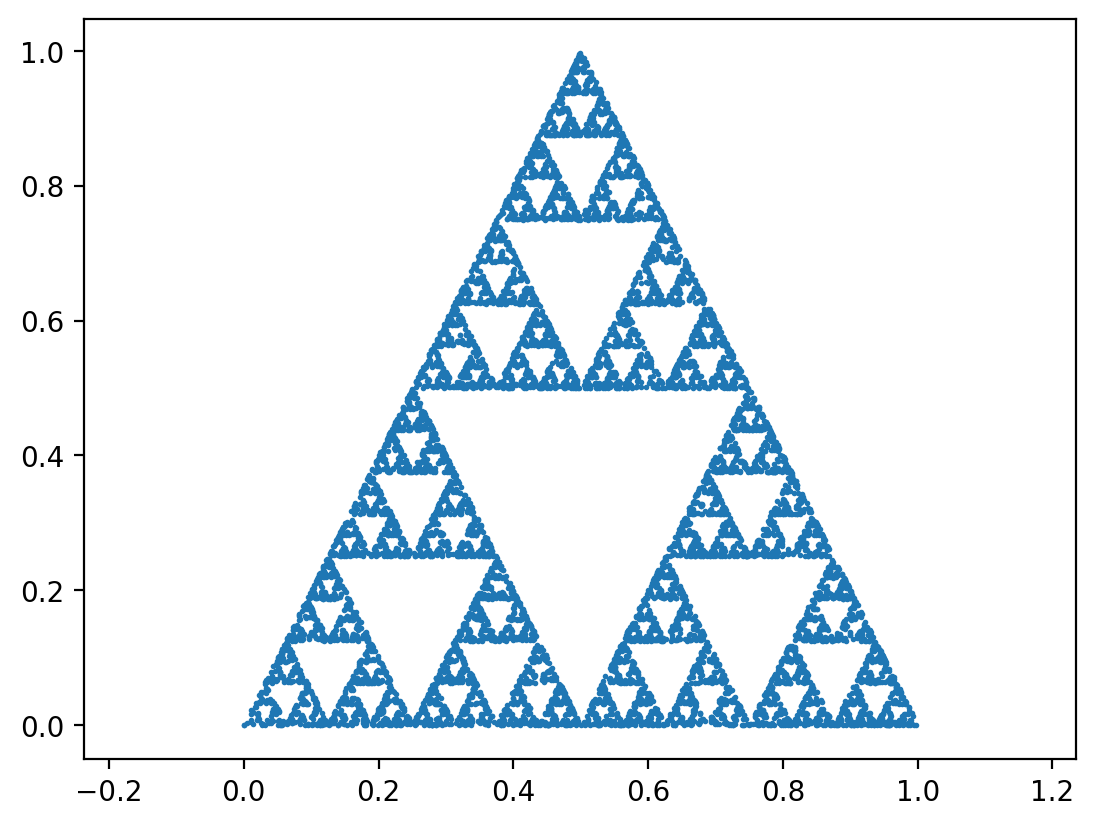

In [24]:
sierpinsky_triangle.draw(10_000)

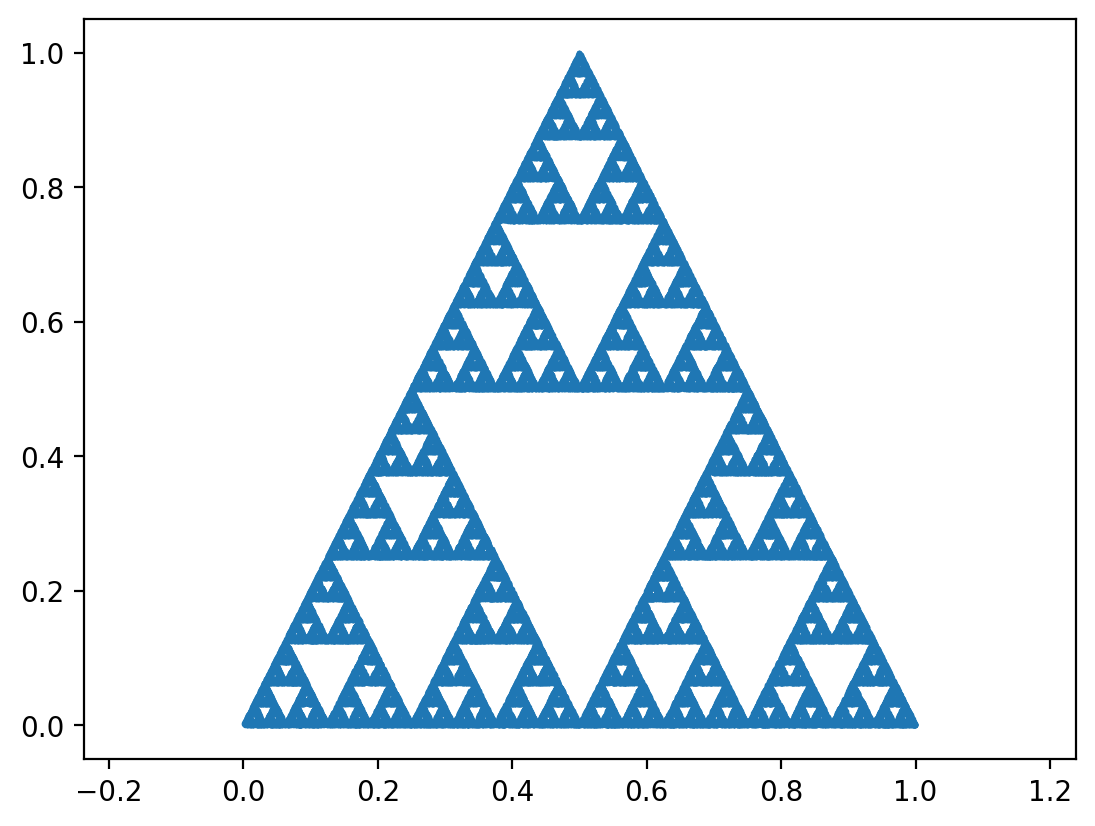

In [25]:
sierpinsky_triangle.draw(100_000)